In [1]:
import hpelm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [183]:
data = pd.read_csv('path_to_save_combined_data.csv')

In [184]:
national_averages = data.groupby('Year').agg({
    'PM2.5': 'mean',
    'Life Expectancy': 'mean',
    'Income': 'mean'
}).reset_index()



In [185]:
national_averages

,Year,PM2.5,Life Expectancy,Income
0,2004,41.961308,65.092857,32767.428571
1,2005,41.536587,65.464286,38957.071429
2,2006,43.130745,65.850000,27910.785714
3,2007,44.233978,66.157143,51336.285714
4,2008,46.996889,66.442857,57525.857143
5,2009,46.710101,66.678571,63715.571429
6,2010,46.737420,66.978571,69905.142857
7,2011,49.402613,67.392857,57123.714286
8,2012,48.132919,67.878571,70396.928571
9,2013,47.590035,68.378571,79227.714286


In [176]:
X = national_averages.drop('Life Expectancy', axis=1)
y = national_averages['Life Expectancy'].values.reshape(-1, 1)
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [178]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(100, 'sigm')

In [179]:
elm.train(X_train, y_train, 'r')

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\hpelm\nnets\slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


In [180]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5933399030092846


In [181]:
mse = mean_absolute_error(y_test, y_pred)
mse

0.6751001292968155

In [182]:
r2 = r2_score(y_test, y_pred)
r2

0.8553081581234983

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
rf = RandomForestRegressor(n_estimators=80)

In [188]:
rf.fit(X_train, y_train)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=80)

In [189]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.29667227359697973


In [190]:
mse = mean_absolute_error(y_test, y_pred)
mse

0.4416071428571726

In [191]:
r2 = r2_score(y_test, y_pred)
r2

0.927653512796417

In [72]:
y_pred1.shape

(179, 1)

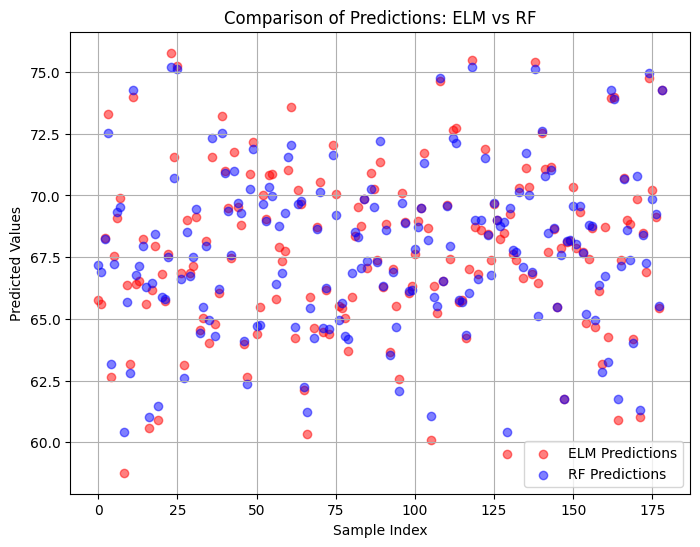

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
indexes = range(len(y_pred1))
plt.scatter(indexes, y_pred1, color='red', alpha=0.5, label='ELM Predictions')
plt.scatter(indexes, y_pred2, color='blue', alpha=0.5, label='RF Predictions')

plt.title('Comparison of Predictions: ELM vs RF')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



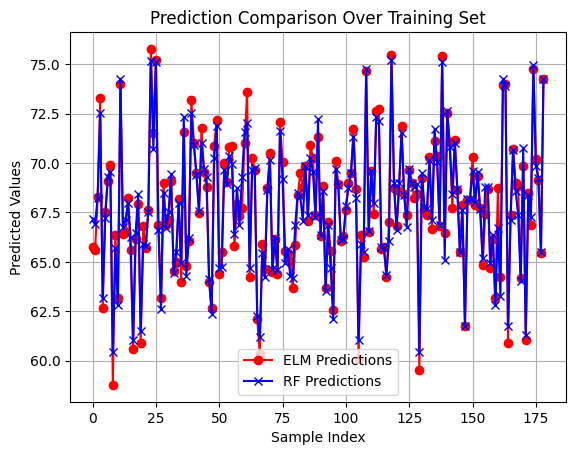

In [74]:

# Now, a line plot comparing both sets of predictions if you have a sequential or indexable dataset
plt.plot(y_pred1, label='ELM Predictions', marker='o', color='red')
plt.plot(y_pred2, label='RF Predictions', marker='x', color='blue')
plt.title('Prediction Comparison Over Training Set')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
y_train.shape

(179, 1)

In [79]:
y_pred1.shape

(179, 1)

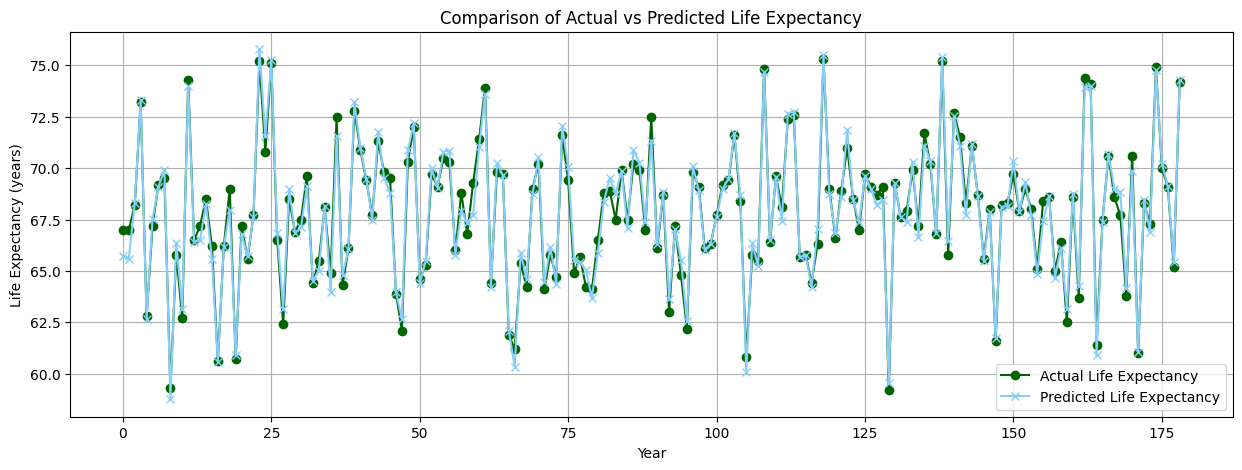

In [105]:
#years = range(2000, 2020)        # Corresponding years or index if available

plt.figure(figsize=(15, 5))
plt.plot(y_train, label='Actual Life Expectancy', marker='o', color='darkgreen')
plt.plot(y_pred1, label='Predicted Life Expectancy', marker='x', color='lightskyblue')
plt.title('Comparison of Actual vs Predicted Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions_india = elm.predict(national_averages[['Year', 'PM2.5', 'Income']])
